<a href="https://colab.research.google.com/github/sateesh12/tf/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
print(tf.__version__)
from keras.layers import Activation, Dense
print(keras.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.12.0
2.12.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10213095986035480693
xla_global_id: -1
]


stats about training data
(60000, 28, 28)
(60000,)
stats about test data
(10000, 28, 28)
(10000,)
A single training data and its label
Output Label 9
Raw input
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   

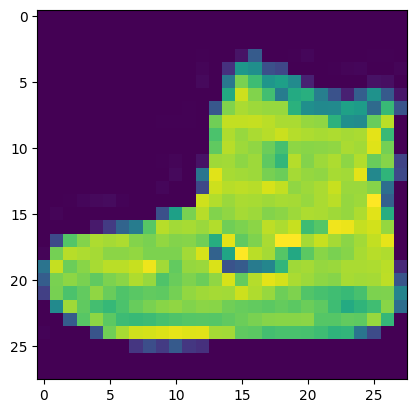

In [ ]:
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[0])


print("stats about training data")
print(X_train.shape)
print(y_train.shape)

print("stats about test data")
print(X_test.shape)
print(y_test.shape)

print('A single training data and its label')
print('Output Label',y_train[0])
print('Raw input\n',X_train[0])

In [ ]:
# Scale the input test and training data.
X_train, X_test = X_train.astype('float32') / 255. , X_test.astype('float32') / 255.

In [ ]:
print('Scaled version')
print(X_train[0])

Scaled version
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.

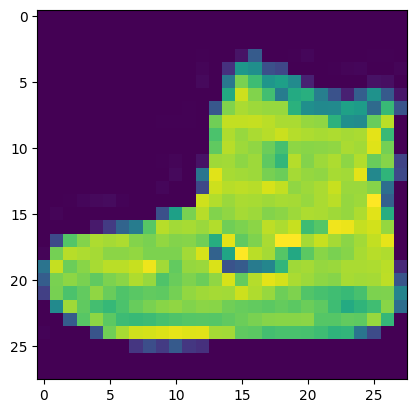

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# Convert from a 2D matrix to a single column vector
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test  = X_test.reshape(X_test.shape[0], 28 * 28)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Create a directory to store the model
if not os.path.exists('models'):
    os.makedirs('models')

In [ ]:
train_set = (X_train, y_train)
test_set  = (X_test,y_test)

In [ ]:
tf.random.set_seed(42)
mnist_fashion_model = tf.keras.Sequential()
mnist_fashion_model.add(Dense(10, input_shape = (784,), activation='sigmoid'))
print(mnist_fashion_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Model tuning parameters
tune_epochs = 10
tune_batch_size = 6000
tune_learning_rate = 0.1
mnist_fashion_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=tune_learning_rate),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'],
             )
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('/models/fashion_mnist_final.h5',monitor='val_accuracy',
                                                        save_best_only=True,mode='max')
history = mnist_fashion_model.fit(train_set[0], train_set[1], batch_size = tune_batch_size, epochs=tune_epochs,validation_data=test_set,
                   callbacks=[checkpoint_callback])
'''
print(history.params)
print(history.history.keys)
print(history.history['loss'])
print(history.history['val_loss'])
'''

Epoch 1/10
10/10 [==============================] - 1s 69ms/step - loss: 7.8969 - accuracy: 0.4129 - val_loss: 4.3797 - val_accuracy: 0.6893
Epoch 2/10
10/10 [==============================] - 0s 43ms/step - loss: 3.7356 - accuracy: 0.7001 - val_loss: 2.1513 - val_accuracy: 0.7376
Epoch 3/10
10/10 [==============================] - 0s 47ms/step - loss: 2.0950 - accuracy: 0.7561 - val_loss: 1.8299 - val_accuracy: 0.7858
Epoch 4/10
10/10 [==============================] - 1s 53ms/step - loss: 1.5223 - accuracy: 0.8051 - val_loss: 1.3876 - val_accuracy: 0.8002
Epoch 5/10
10/10 [==============================] - 1s 60ms/step - loss: 1.1159 - accuracy: 0.8185 - val_loss: 1.0786 - val_accuracy: 0.8169
Epoch 6/10
10/10 [==============================] - 1s 52ms/step - loss: 0.8600 - accuracy: 0.8295 - val_loss: 0.8581 - val_accuracy: 0.8184
Epoch 7/10
10/10 [==============================] - 1s 57ms/step - loss: 0.7150 - accuracy: 0.8351 - val_loss: 0.7256 - val_accuracy: 0.8268
Epoch 8/10
10

"\nprint(history.params)\nprint(history.history.keys)\nprint(history.history['loss'])\nprint(history.history['val_loss'])\n"

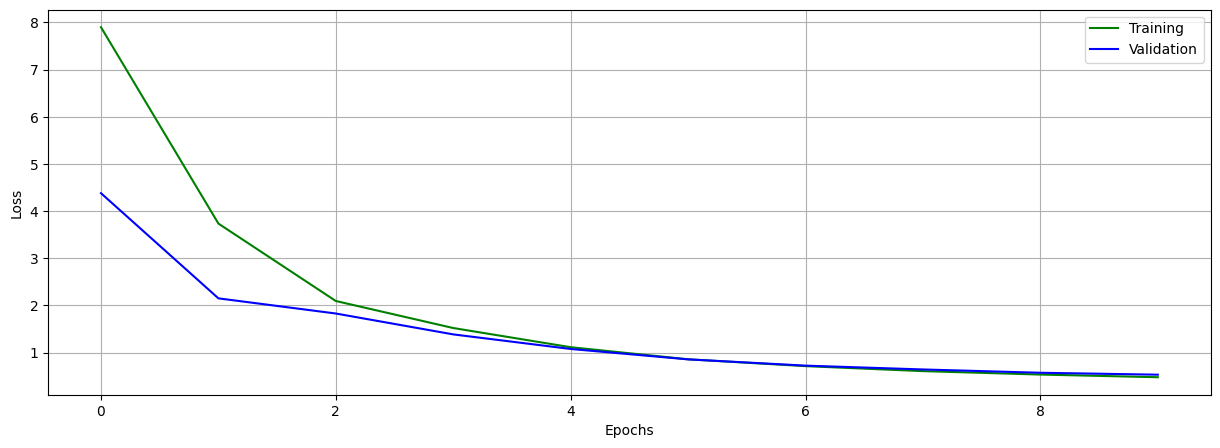

In [ ]:
plt.figure(figsize=[15,5])
plt.plot(history.history['loss'], 'g')
plt.plot(history.history['val_loss'], 'b')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['Training', 'Validation'], loc='upper right');
plt.grid(True)

In [ ]:
# Check the performance of the model
assert mnist_fashion_model.evaluate(X_test,y_test, verbose=1)[1] >= 0.85

313/313 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.8359


AssertionError: ignored

In [ ]:
# Make predictions
class_names = ['T-shirts/top', 'Trouser','Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
num_rows = 5
num_cols = 5
num_samples = num_rows * num_cols
sample_index = np.random.randint(0, 10000, num_samples)

X_sample = X_test[sample_index]
gt_sample = y_test[sample_index]
plt.figure(figsize=(24,18))
for i , sample in enumerate(X_sample):
    gt_class = class_names[gt_sample[i]]
    sample = sample.reshape(1, 784)
    pred = mnist_fashion_model.predict(sample)
    pred_class_number = np.argmax(pred)
    pred_class = class_names[pred_class_number]
    if gt_class == pred_class:
        print("Correct prediction")
        print("Actual class is:", gt_class, "Predicted class:", pred_class)
    else:
        print("In-Correct prediction")
        print("Actual class is:", gt_class, "Predicted class:", pred_class)

1/1 [==============================] - 0s 77ms/step
Correct prediction
Actual class is: Trouser Predicted class: Trouser
1/1 [==============================] - 0s 23ms/step
Correct prediction
Actual class is: Trouser Predicted class: Trouser
1/1 [==============================] - 0s 22ms/step
In-Correct prediction
Actual class is: Ankle Boot Predicted class: Sandal
1/1 [==============================] - 0s 24ms/step
In-Correct prediction
Actual class is: Ankle Boot Predicted class: Sandal
1/1 [==============================] - 0s 23ms/step
Correct prediction
Actual class is: Sandal Predicted class: Sandal
1/1 [==============================] - 0s 25ms/step
Correct prediction
Actual class is: T-shirts/top Predicted class: T-shirts/top
1/1 [==============================] - 0s 26ms/step
In-Correct prediction
Actual class is: Coat Predicted class: T-shirts/top
1/1 [==============================] - 0s 32ms/step
Correct prediction
Actual class is: Sandal Predicted class: Sandal
1/1 [======

<Figure size 2400x1800 with 0 Axes>